EC9630 Machine Learning - laboratory 01

Task: STASTICAL PATTEN CLASSIFICATION

Name: LIYANAGE L.D.T.N.

RegNo: 2020/E/082

Date: 28th April 2024

Time:

**Question 02**

(a).
The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.
Dataset Characteristics
Tabular, Multivariate


---


Subject Area:
Health and Medicine


---


Associated Tasks:
Classification


---


Feature Type:
Categorical, Integer


---


Instances:
253680


---


Features:
21


---



(b).
Categorical and Integer

(c).
Features: The dataset includes various features like demographics, health history, and personal information that are used to predict the target variable, which is the diabetes status of the individual.

Labels: The target variable in the dataset is the diabetes diagnosis, categorized into three classes: Diabetes, Pre-diabetes, and Healthy. This variable is used for classification purposes to predict the health status of individuals based on the provided features.

(d).
21 Features.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CSV FILE/diabetes_012_health_indicators_BRFSS2015.csv")
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [3]:
# the Variable type informationS
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Identify features (all columns except the label column)
features = df.drop(columns=['Diabetes_012'])

labels = df['Diabetes_012']

# Display the list of features
print("Features:")
print(features.columns.tolist())
print("\nLabel:")
print(labels.name)

Features:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Label:
Diabetes_012


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Print the column names
print("Column names:")
print(df.columns)

Column names:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')



Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Numerical feature distributions:

BMI:
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64


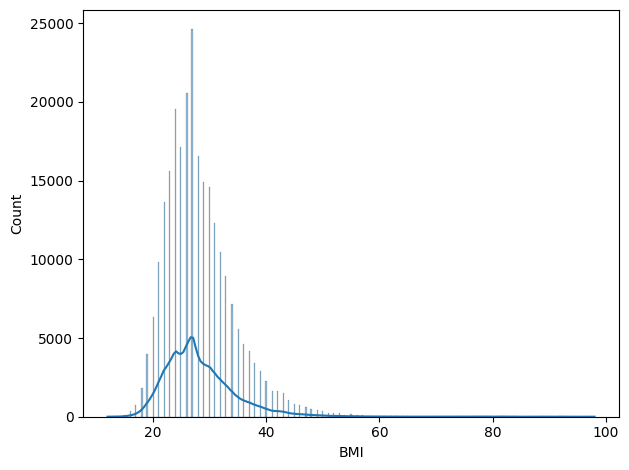


Age:
count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64


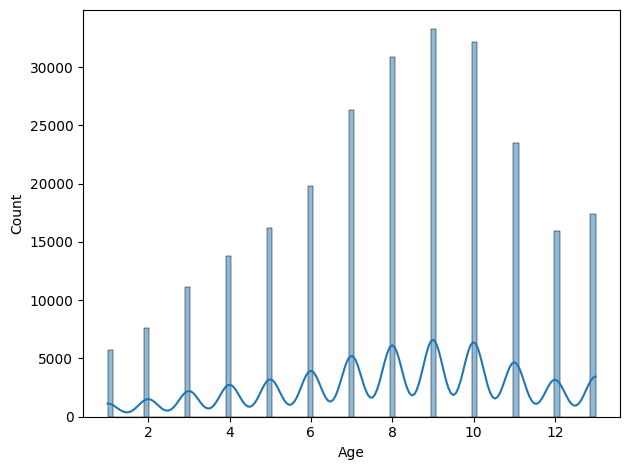


Fruits:
count    253680.000000
mean          0.634256
std           0.481639
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Fruits, dtype: float64


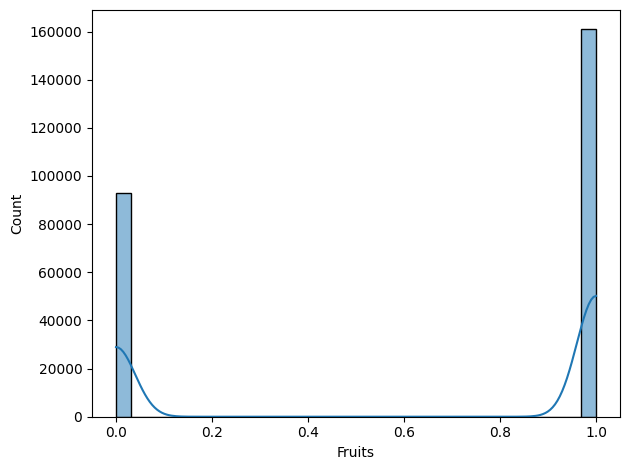


Veggies:
count    253680.000000
mean          0.811420
std           0.391175
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Veggies, dtype: float64


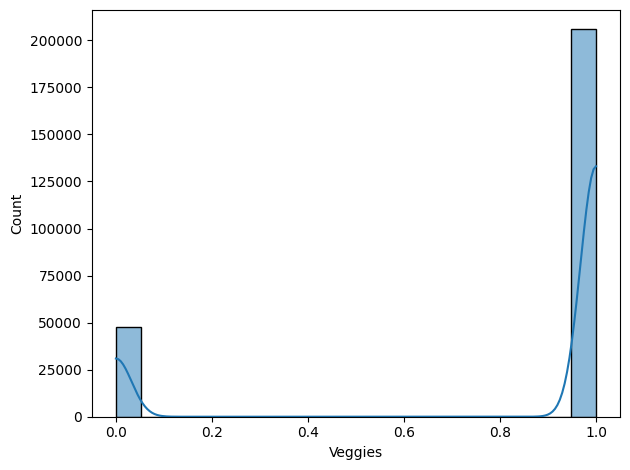


PhysActivity:
count    253680.000000
mean          0.756544
std           0.429169
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PhysActivity, dtype: float64


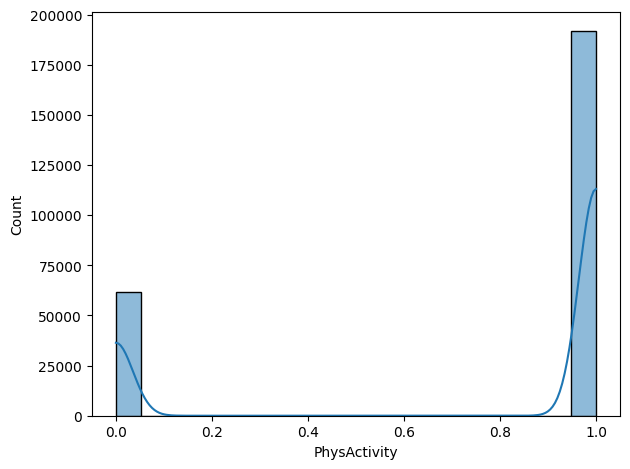


Categorical feature distributions:

Sex:
Sex
0.0    141974
1.0    111706
Name: count, dtype: int64


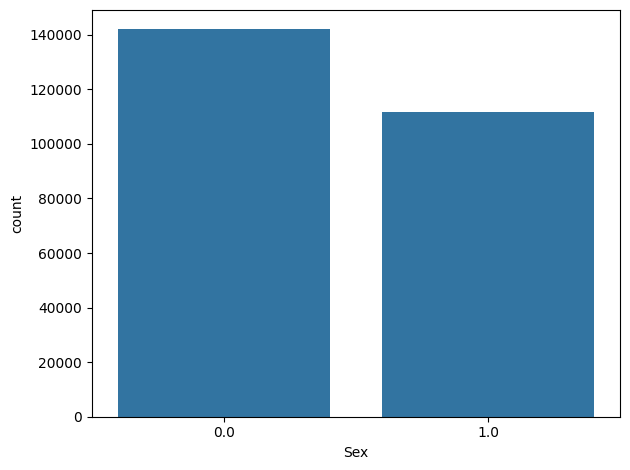


HighBP:
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64


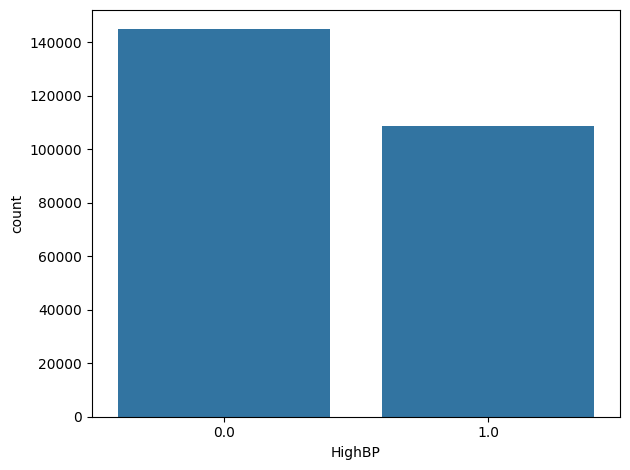


HighChol:
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64


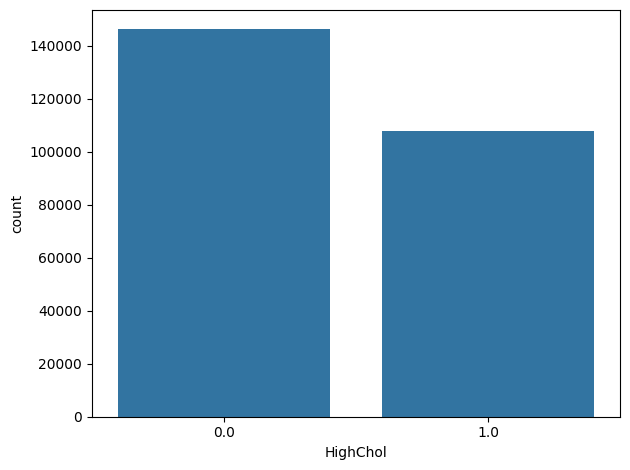


Smoker:
Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64


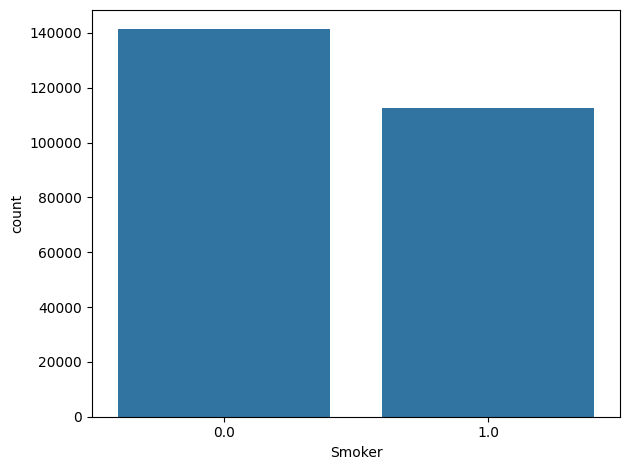

In [7]:
#  missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Distributions-Numerical feature
print("\nNumerical feature distributions:")
for col in ['BMI', 'Age', 'Fruits', 'Veggies', 'PhysActivity']:
    print(f"\n{col}:")
    print(df[col].describe())
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.tight_layout()
    plt.show()

# Distributions-Categorical feature
print("\nCategorical feature distributions:")
for col in ['Sex', 'HighBP', 'HighChol', 'Smoker']:
    print(f"\n{col}:")
    print(df[col].value_counts())
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.tight_layout()
    plt.show()

First few rows of the dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0 

<Figure size 1200x1000 with 0 Axes>

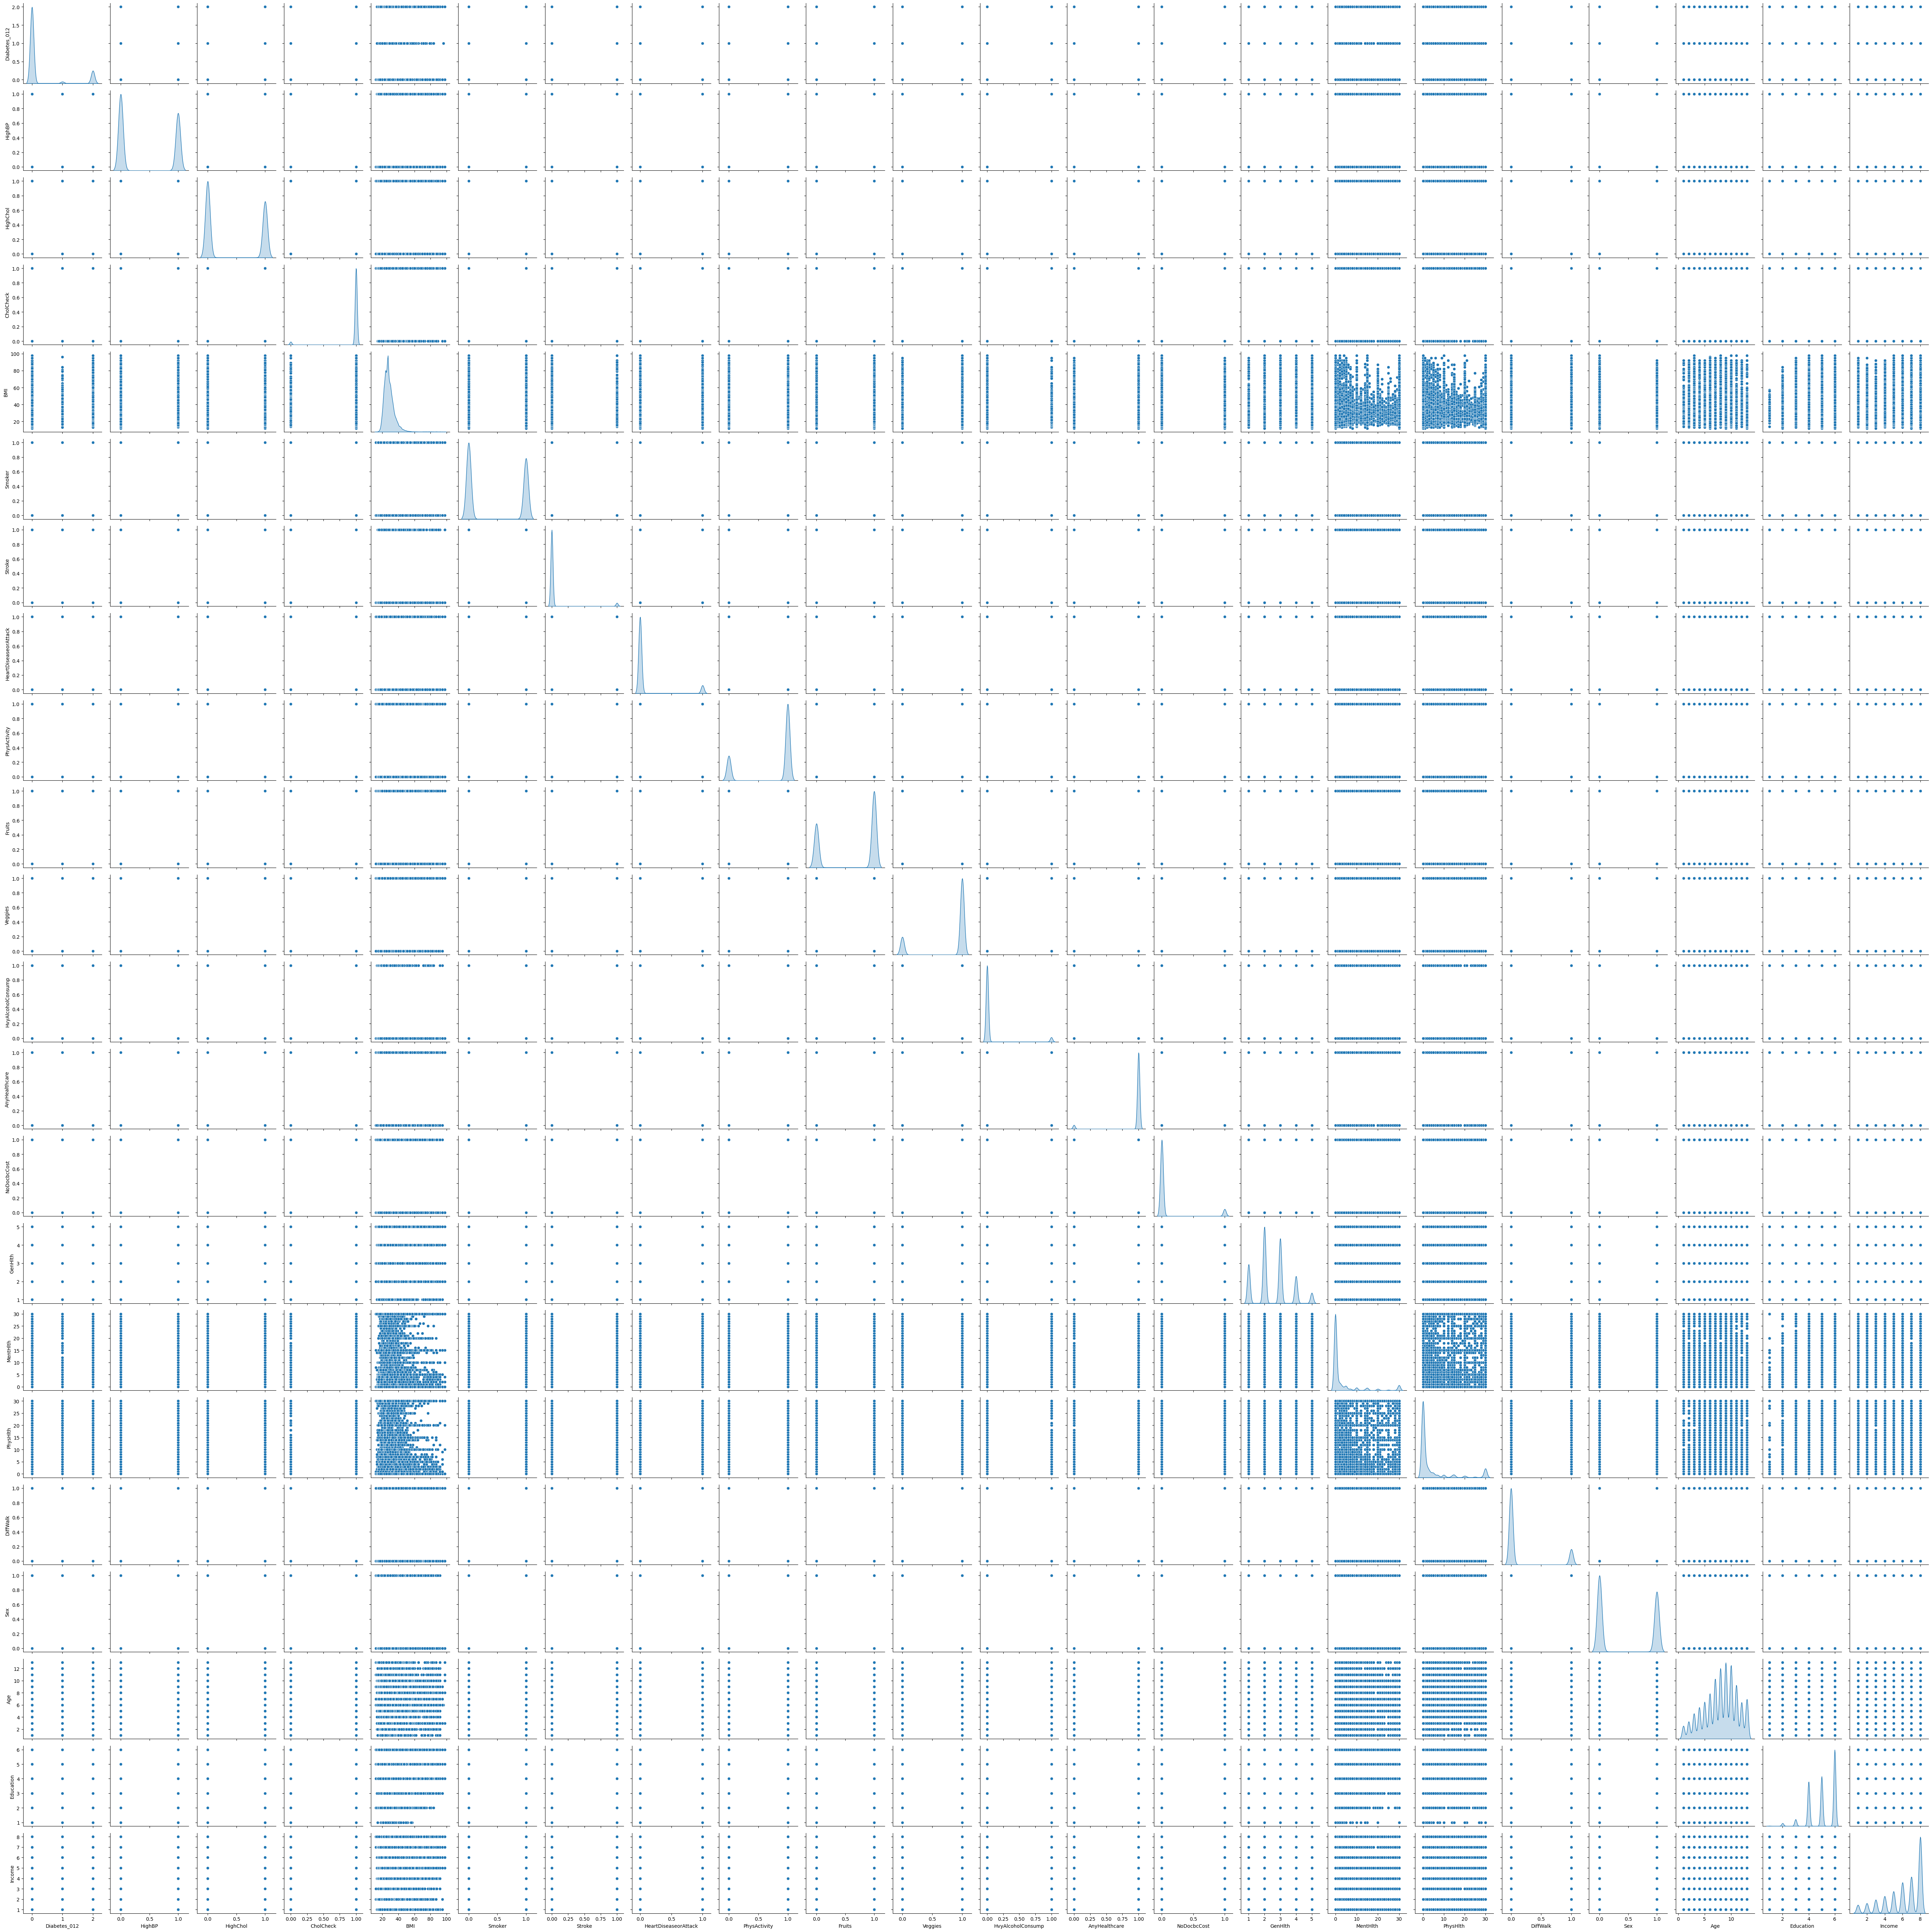


Shapes of features and labels:
Features shape: (253680, 21)
Labels shape: (253680,)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())

# Create a correlation matrix for numerical variables
print("\nCorrelation matrix:")
print(df.corr())

# Create a scatter plot matrix for numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df, diag_kind="kde")
plt.tight_layout()
plt.show()

# Handling missing values
df = df.dropna()  # Dropping rows with missing values
# Alternatively, fill missing values with the mean: df = df.fillna(df.mean())

# Encoding categorical variables using one-hot encoding
categorical_cols = ['Sex', 'HighBP', 'HighChol', 'Smoker']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Splitting features and labels
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Display the shapes of features and labels
print("\nShapes of features and labels:")
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


In [9]:
# Task 4: Separating features and labels
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']  # Labels

# Print the shapes of features and labels
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)


Shape of features (X): (253680, 21)
Shape of labels (y): (253680,)


In [10]:
# Task 5: Calculating Information Gain
from sklearn.metrics import mutual_info_score

# Separate features and labels
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Calculate information gain for each feature
information_gain = []
for feature in X.columns:
    info_gain = mutual_info_score(X[feature], y)
    information_gain.append(info_gain)

# Create a DataFrame to display feature information gain
feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})
feature_info_gain = feature_info_gain.sort_values(by='Information Gain', ascending=False)
print(feature_info_gain)


                 Feature  Information Gain
10               GenHlth          0.047067
18            HighBP_1.0          0.037435
1                    BMI          0.030067
14                   Age          0.022087
19          HighChol_1.0          0.022049
13              DiffWalk          0.021242
16                Income          0.015080
12              PhysHlth          0.014923
3   HeartDiseaseorAttack          0.013050
15             Education          0.008582
4           PhysActivity          0.006936
2                 Stroke          0.004573
0              CholCheck          0.003242
11              MentHlth          0.003085
7      HvyAlcoholConsump          0.002043
20            Smoker_1.0          0.001980
6                Veggies          0.001671
5                 Fruits          0.000884
9            NoDocbcCost          0.000722
17               Sex_1.0          0.000492
8          AnyHealthcare          0.000143


In [11]:
# Task 6: Splitting Data into Train, Validation, and Test Sets
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Print the shapes of the data splits
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (177576, 21)
Shape of y_train: (177576,)
Shape of X_val: (57078, 21)
Shape of y_val: (57078,)
Shape of X_test: (19026, 21)
Shape of y_test: (19026,)


In [13]:
# Task 7: Training a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


In Task 7,

01. Imports the DecisionTreeClassifier from scikit-learn's tree module and the
accuracy_score function from the metrics module.
02. Creates an instance of the DecisionTreeClassifier with random_state=42 for reproducibility.
03. Trains the decision tree model on the training data X_train and y_train using the fit method.
04. Makes predictions on the test data X_test using the predict method and stores the predictions in y_pred.
05. Calculates the accuracy of the model by comparing the predicted labels y_pred with the true labels y_test using the accuracy_score function.
06. Prints the accuracy score.

Hyperparameters of the decision tree model and their significance:

01. criterion (default='gini'): This parameter specifies the function to measure the quality of a split. The two options are 'gini' for the Gini impurity and 'entropy' for the information gain (entropy). According to the scikit-learn documentation , the Gini impurity is a measure of node impurity, and it is the default criterion for classification tasks.
02. max_depth (default=None): This parameter sets the maximum depth of the tree. A higher value allows the tree to grow deeper, which can lead to overfitting on the training data. Setting it to None (default) means that the tree can grow without any depth restriction.
03. min_samples_split (default=2): This parameter specifies the minimum number of samples required to split an internal node. A higher value can prevent overfitting by not allowing splits in nodes with too few samples.
04. min_samples_leaf (default=1): This parameter sets the minimum number of samples required to be at a leaf node. Increasing this value can prevent overfitting by pruning the tree and reducing the number of leaf nodes.
05. max_features (default=None): This parameter limits the number of features to consider when looking for the best split. Setting it to None (default) means that all features are considered for splitting.
06. random_state (default=None): This parameter controls the randomness of the decision tree's behavior when using random subsets of features for splitting. Setting a fixed value ensures reproducibility of results.

In [14]:
# Task 8: Evaluating Training Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = dtc.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.99


In [15]:
# Task 9: Evaluating Test Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = dtc.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.77


Task 10

Accuracy: The ratio of correctly predicted instances to the total number of instances. It's a good metric when the classes are balanced, but it can be misleading when there is a class imbalance.

Precision: The ratio of true positives to the total predicted positives (true positives + false positives). It measures the model's ability to avoid false positives.

Recall: The ratio of true positives to the total actual positives (true positives + false negatives). It measures the model's ability to detect all positive instances.

F1 Score: The harmonic mean of precision and recall, providing a balanced measure of both metrics. It's useful when you want to consider both precision and recall equally.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate Precision (macro-average)
precision = precision_score(y_test, y_test_pred, average='macro')

# Calculate Recall (macro-average)
recall = recall_score(y_test, y_test_pred, average='macro')

# Calculate F1 Score (macro-average)
f1 = f1_score(y_test, y_test_pred, average='macro')

# Print the Evaluation Scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.77
Precision: 0.39
Recall: 0.40
F1 Score: 0.39


In [19]:
# Task 11: Performing Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Perform 5-fold cross-validation
cv_results = cross_validate(dtc, X, y, cv=5, scoring=scoring)

# Print the evaluation scores for each metric
print("5-Fold Cross-Validation Evaluation:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f}")
print(f"F1 Score: {cv_results['test_f1'].mean():.2f}")

5-Fold Cross-Validation Evaluation:
Accuracy: 0.77
Precision: 0.40
Recall: 0.40
F1 Score: 0.40
